In [ ]:
file = "data/de_Valdecilla/ResourcesModel.csv"

# Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data/de_Valdecilla/ActivityModel.csv")

D:\miniconda3\envs\tfgpu\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Pre-procesado

In [2]:
print(data.shape)
data.head()

(287681, 36)


,AppointmentDateTime,ScheduledEndTime,AppointmentStatus,ActivityName,IsScheduled,ActivityCategory,ActivityStartDateTime,ActivityEndDateTime,ActivityPriority,ActivityNote,...,ctrResourceSer,PatientInOutStatus,ReferringPhysicianFullName,ctrScheduledActivitySer,ctrActivityInstanceSer,ctrActivitySer,ctrActivityCategorySer,ctrDepartmentSer,ctrCreatedByResourceSer,LastSyncTime
0,NaN,NaN,Abierto,Cálculo MU,Y,Tareas de planificación,NaN,NaN,Medium,Repetir ArcCheck_2,...,1269,Out,NaN,149325,230462,253,78,1,1084,2021-05-27 16:45:01
1,NaN,NaN,Abierto,Cálculo MU,Y,Tareas de planificación,NaN,NaN,Medium,Repetir ArcCheck_2,...,1066,Out,NaN,149325,230462,253,78,1,1084,2021-05-27 16:45:01
2,NaN,NaN,Abierto,Contraste,Y,Simulación,NaN,NaN,Medium,NaN,...,1093,Out,NaN,163039,258824,466,54,1,1068,2021-05-27 16:45:01
3,NaN,NaN,Abierto,Asignar pase interconsulta,Y,Registro,NaN,NaN,Medium,NaN,...,1059,Out,NaN,28227,28832,390,72,1,1079,2021-05-27 16:45:01
4,NaN,NaN,Abierto,Asignar pase interconsulta,Y,Registro,NaN,NaN,Medium,NaN,...,1058,Out,NaN,28227,28832,390,72,1,1079,2021-05-27 16:45:01


In [5]:
data["AppointmentDateTime"] = pd.to_datetime(data["AppointmentDateTime"])
data = data.sort_values(by = "AppointmentDateTime")

In [6]:
data.drop_duplicates()
print(data.shape)

(287681, 36)


In [7]:
data['WaitTime'].replace({'-': 0}, inplace = True)
data["WaitTime"] = data["WaitTime"].astype("int16")

In [11]:
data.head()
data.iloc[100,:]

AppointmentDateTime                           2016-05-20 12:00:00
ScheduledEndTime                            5/20/2016 12:15:00 PM
AppointmentStatus                          Completado manualmente
ActivityName                                   Tratamiento diario
IsScheduled                                                     Y
ActivityCategory                                      Tratamiento
ActivityStartDateTime                                         NaN
ActivityEndDateTime                           7/6/2016 4:43:25 PM
ActivityPriority                                           Medium
ActivityNote                                                  NaN
ActivityCreatedBy                                             NaN
PatientId                                                 5027937
PatientId2                                                    NaN
PatientArrivalDateTime                                        NaN
CheckedIn                                                       N
HospitalNa

In [9]:
trats = data[(data["ActivityCategory"]=="Tratamiento") & (data["AppointmentDateTime"].notnull()) 
             & (data["ctrPatientSer"]!=0) & (data["ctrPatientSer"]!=755)]

# histograma WaitTime

In [ ]:
plt.hist( data["WaitTime"], range=[0,300], bins=100)
plt.show()

In [ ]:
tratamientos = data[(data["ActivityCategory"]=="Tratamiento") & (data["ActivityCategory"])]

# Tratamientos

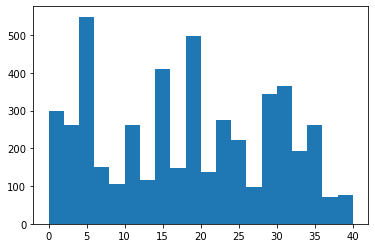

In [14]:
ntrat = trats["ctrPatientSer"].value_counts()
# print(ntrat)
# np.mean(ntrat)
# np.sum(ntrat)

# histograma del número de sesiones de tratamiento recibidas por paciente
plt.hist(ntrat, bins=20, range=[0,40])
plt.show()

In [ ]:
print(trats["ctrActivitySer"].unique().shape)
print(trats["ctrActivityInstanceSer"].unique().shape)
print(trats["ctrScheduledActivitySer"].unique().shape)
print(trats["ctrPatientSer"].unique().shape)

In [15]:
trats[trats["ctrScheduledActivitySer"]==59]

,AppointmentDateTime,ScheduledEndTime,AppointmentStatus,ActivityName,IsScheduled,ActivityCategory,ActivityStartDateTime,ActivityEndDateTime,ActivityPriority,ActivityNote,...,ctrResourceSer,PatientInOutStatus,ReferringPhysicianFullName,ctrScheduledActivitySer,ctrActivityInstanceSer,ctrActivitySer,ctrActivityCategorySer,ctrDepartmentSer,ctrCreatedByResourceSer,LastSyncTime
276,2016-05-17 11:15:00,5/17/2016 11:25:00 AM,Completado manualmente,Inicio nuevo,Y,Tratamiento,5/17/2016 3:09:52 PM,5/7/2018 9:03:14 AM,Medium,NaN,...,1033,Out,NaN,59,84,242,55,1,1044,2021-05-27 16:45:01
12055,2018-04-10 12:19:59,9/19/2016 6:00:00 PM,Completado,Tratamiento diario,N,Tratamiento,4/10/2018 12:19:59 PM,4/10/2018 12:19:59 PM,Medium,NaN,...,1094,Out,NaN,59,10118,243,55,1,1134,2021-05-27 16:45:01
12054,2018-04-10 12:19:59,9/19/2016 6:00:00 PM,Completado,Tratamiento diario,N,Tratamiento,4/10/2018 12:19:59 PM,4/10/2018 12:19:59 PM,Medium,NaN,...,1070,Out,NaN,59,10118,243,55,1,1134,2021-05-27 16:45:01
12332,2018-04-10 12:19:59,9/19/2016 6:00:00 PM,Completado,Tratamiento diario,N,Tratamiento,4/10/2018 12:19:59 PM,4/10/2018 12:19:59 PM,Medium,NaN,...,1097,Out,NaN,59,10118,243,55,1,1134,2021-05-27 16:45:01


In [ ]:
data["ActivityCategory"].value_counts()

In [ ]:
data.shape

In [ ]:
data["ClinicalStatus"].value_counts()

In [17]:
data[(data["AppointmentDateTime"]>"2025")]

,AppointmentDateTime,ScheduledEndTime,AppointmentStatus,ActivityName,IsScheduled,ActivityCategory,ActivityStartDateTime,ActivityEndDateTime,ActivityPriority,ActivityNote,...,ctrResourceSer,PatientInOutStatus,ReferringPhysicianFullName,ctrScheduledActivitySer,ctrActivityInstanceSer,ctrActivitySer,ctrActivityCategorySer,ctrDepartmentSer,ctrCreatedByResourceSer,LastSyncTime
287652,2069-01-01 08:00:00,1/1/2069 9:00:00 AM,Abierto,Contorneo Tecnico,Y,Dosimetria,NaN,NaN,Medium,NaN,...,1046,NaN,NaN,115363,170397,351,90,1,1068,2021-05-27 16:45:01
287654,2069-01-01 11:15:00,1/1/2069 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13934,14047,380,55,1,1086,2021-05-27 16:45:01
287572,2069-01-01 11:15:00,1/1/2069 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13944,14057,380,55,1,1086,2021-05-27 16:45:01
287653,2069-01-01 11:15:00,1/1/2069 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13923,14036,380,55,1,1086,2021-05-27 16:45:01
287669,2070-01-01 08:00:00,1/1/2070 9:00:00 AM,Abierto,Contorneo Tecnico,Y,Dosimetria,NaN,NaN,Medium,NaN,...,1046,NaN,NaN,115364,170398,351,90,1,1068,2021-05-27 16:45:01
287655,2070-01-01 11:15:00,1/1/2070 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13924,14037,380,55,1,1086,2021-05-27 16:45:01
287670,2070-01-01 11:15:00,1/1/2070 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13945,14058,380,55,1,1086,2021-05-27 16:45:01
287660,2070-01-01 11:15:00,1/1/2070 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13935,14048,380,55,1,1086,2021-05-27 16:45:01
287548,2071-01-01 08:00:00,1/1/2071 9:00:00 AM,Abierto,Contorneo Tecnico,Y,Dosimetria,NaN,NaN,Medium,NaN,...,1046,NaN,NaN,115365,170399,351,90,1,1068,2021-05-27 16:45:01
287661,2071-01-01 11:15:00,1/1/2071 11:45:00 AM,Abierto,DESCANSO,Y,Tratamiento,NaN,NaN,Medium,NaN,...,1185,NaN,NaN,13946,14059,380,55,1,1086,2021-05-27 16:45:01


In [ ]:
# data["ActivityCategory"].value_counts()

In [ ]:
trats = data[(data["ActivityCategory"]=="Tratamiento") & (data["AppointmentDateTime"].notnull())]

In [ ]:
data.columns

In [ ]:
trats[trats["ctrPatientSer"]==243]